# Medical Cost Multivariate Linear Regression

In this notebook, a dataset with information about customers and their medical insurance cost is analyzed and a model is trained with linear regression to predict other costs.

# Outline
- [ 1 - Packages ](#1)
- [ 2 - Preprocessing Data](#2)
  - [ 2.1 Loading and Visualizing the Data](#2.1)
  - [ 2.2 Features and Labels](#2.2)
- [ 3 - Model](#3)
  - [ 3.1 Linear Regression](#3.1)
  - [ 3.2 Polynomal Regression](#3.2)
- [ 4 - Results](#4)

<a name="1"></a>
## 1 - Packages 

Below are all the needed packages for this notebook.
- [numpy](https://www.numpy.org) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [matplotlib](https://matplotlib.org) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/index.html#) is a Python data visualization library based on matplotlib
- [scikit-learn](https://scikit-learn.org/stable/) is a library of simple and efficient tools for predictive data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

<a name="2"></a>
## 2 - Preprocessing Data

The dataset contains customer information, region, and their medical cost. The bmi feature stands for body mass index.

The dataset can be found here: [Medical Cost Personal Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance?datasetId=13720&sortBy=voteCount&utm)
<br/><br/>
<a name="2.1"></a>
### 2.1 Loading and Visualizing the Data

In [2]:
#Load data
data = pd.read_csv("./Data/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(f"data shape: {data.shape}")

data shape: (1338, 7)


Some of the variables are categorical, let's convert them to numerical values.

In [5]:
#Change string variables to numerical
data_plot = data.copy()
data_plot.loc[data_plot['sex'] == 'female', ['sex']] = 1
data_plot.loc[data_plot['sex'] == 'male', ['sex']] = 2
data_plot.loc[data_plot['smoker'] == 'no', ['smoker']] = 0
data_plot.loc[data_plot['smoker'] == 'yes', ['smoker']] = 1
data_plot.loc[data_plot['region'] == 'southwest', ['region']] = 1
data_plot.loc[data_plot['region'] == 'southeast', ['region']] = 2
data_plot.loc[data_plot['region'] == 'northwest', ['region']] = 3
data_plot.loc[data_plot['region'] == 'northeast', ['region']] = 4

#convert to int type
data_plot['sex'] = pd.to_numeric(data_plot['sex'])
data_plot['smoker'] = pd.to_numeric(data_plot['smoker'])
data_plot['region'] = pd.to_numeric(data_plot['region'])

data_plot.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,0,2,1725.55230
2,28,2,33.000,3,0,2,4449.46200
3,33,2,22.705,0,0,3,21984.47061
4,32,2,28.880,0,0,3,3866.85520


In [6]:
data_plot.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

Let's now graph some of our features to make more sense of the data.

Text(0, 0.5, 'Charges')

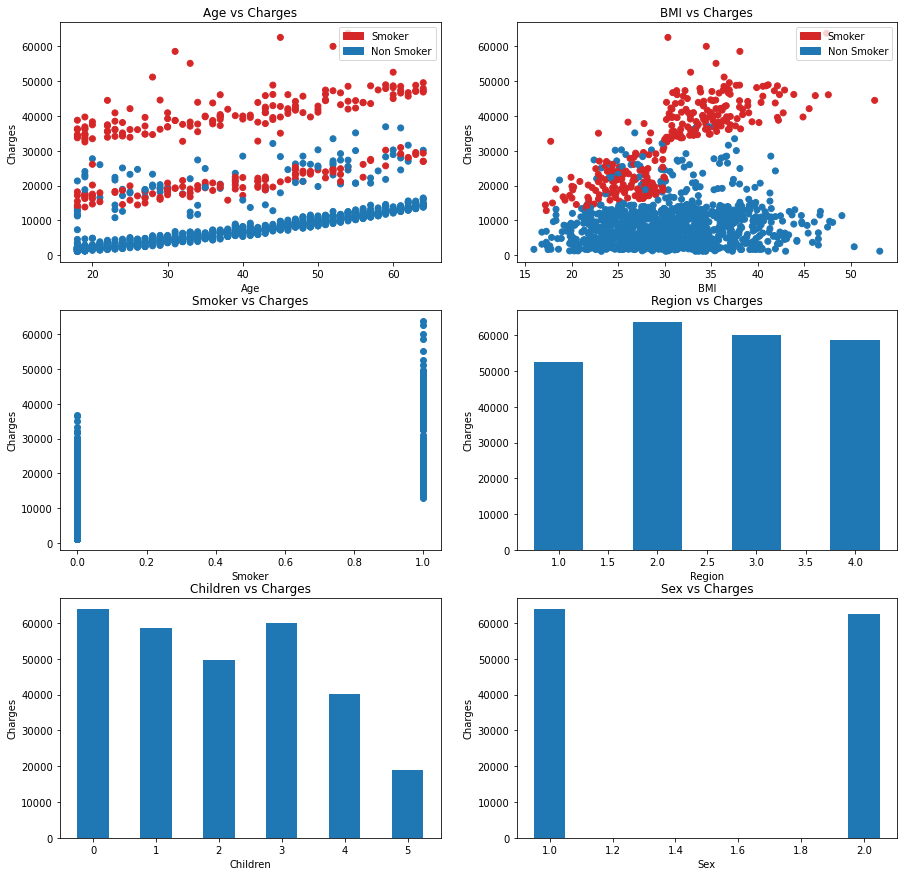

In [7]:
#Plot features
plt.subplots(figsize=(15,15))
plt.subplot(3, 2, 1)
plt.title('Age vs Charges')
smokers = {1:'tab:red', 0:'tab:blue'}
plt.scatter(data_plot['age'].values, data_plot['charges'].values, c=data_plot['smoker'].map(smokers))
red_patch = mpatches.Patch(color='tab:red', label='Smoker')
blue_patch = mpatches.Patch(color='tab:blue', label='Non Smoker')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.subplot(3, 2, 2)
plt.title('BMI vs Charges')
smokers = {1:'tab:red', 0:'tab:blue'}
plt.scatter(data_plot['bmi'].values, data_plot['charges'].values, c=data_plot['smoker'].map(smokers))
red_patch = mpatches.Patch(color='tab:red', label='Smoker')
blue_patch = mpatches.Patch(color='tab:blue', label='Non Smoker')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.subplot(3, 2, 3)
plt.title('Smoker vs Charges')
plt.scatter(data_plot['smoker'].values, data_plot['charges'].values)
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.subplot(3, 2, 4)
plt.title('Region vs Charges')
plt.bar(data_plot['region'].values, data_plot['charges'].values, 0.5)
plt.xlabel('Region')
plt.ylabel('Charges')

plt.subplot(3, 2, 5)
plt.title('Children vs Charges')
plt.bar(data_plot['children'].values, data_plot['charges'].values, 0.5)
plt.xlabel('Children')
plt.ylabel('Charges')

plt.subplot(3, 2, 6)
plt.title('Sex vs Charges')
plt.bar(data_plot['sex'].values, data_plot['charges'].values, 0.1)
plt.xlabel('Sex')
plt.ylabel('Charges')

Looking at the graphs above:

- From the first two graphs plotting age and BMI, we can see there is a clear distinction between smokers and non smokers. The smoking group clearly has higher charges for their medical bill, further confirmed by the smoker graph.


- Age also seems to increase chargres, but for BMI, charge only increases along if the customer is a smoker.


- The region of the customer does not seem to have an effect on charges.


- The more children a customer has, charges seem to decrease. Customers with 3 children still reached high charges, however this could be outlier cases.


- As with region, sex does not seem to have an impact on charges.

Let's now see how the features correlate with a correlation map.

<AxesSubplot:>

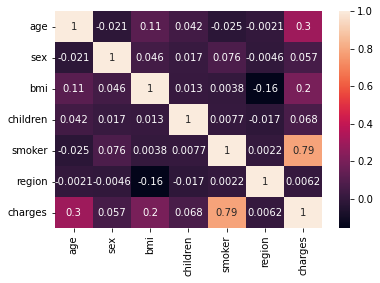

In [8]:
#Correlation map
sns.heatmap(data_plot.corr(), annot=True)#, cmap='hot')

As expected, region and sex have the least correlation with charges, and smoking has the highest correlation.

<a name="2.2"></a>
### 2.2 Features and Labels

Now we can get the features and labels to train and test the model. For the features, let's drop the redundant variables that we found.

In [9]:
#Get features and labels
x = data_plot.drop(['region', 'sex', 'charges'], axis=1).values
y = data_plot['charges'].values

In [10]:
print(f"Features: {x}\n")
print(f"Labels: {y}")

Features: [[19.   27.9   0.    1.  ]
 [18.   33.77  1.    0.  ]
 [28.   33.    3.    0.  ]
 ...
 [18.   36.85  0.    0.  ]
 [21.   25.8   0.    0.  ]
 [61.   29.07  0.    1.  ]]

Labels: [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [11]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

<a name="3"></a>
## 3 - Model


<a name="3.1"></a>
### 3.1 Linear Regression

Now let's fit the training data to the Linear Regression model.

In [12]:
#Train model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
#Get coefficents
print(f"Coefficents: {model.coef_}")

Coefficents: [  257.82530981   320.9618067    469.37053651 23415.30534096]


In [14]:
y_pred = model.predict(x_test)
print(f"First five predictions of test data: {y_pred[0:5]}")

First five predictions of test data: [11494.66343731  9939.13858872 37674.80720199 15971.18826784
  6867.78163959]


In [15]:
print(f"Model score: {model.score(x_train, y_train)}")
print(f"Model test score: {model.score(x_test,y_test)}")
print(f"Model mean squared error: {mean_squared_error(y_pred, y_test)}")

Model score: 0.7300423756673933
Model test score: 0.7894429387120754
Model mean squared error: 33577421.938634135


Text(0, 0.5, 'Predicted')

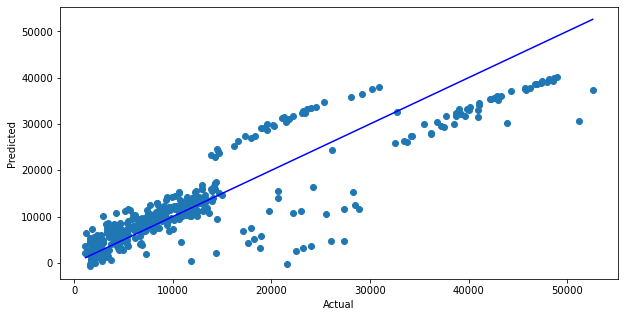

In [16]:
#Plot model
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue")
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [17]:
#Get actual and predicted charges difference
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Difference": y_test-y_pred})
pred_df[0:20]

,Actual,Predicted,Difference
0,9724.53000,11494.663437,-1770.133437
1,8547.69130,9939.138589,-1391.447289
2,45702.02235,37674.807202,8027.215148
3,12950.07120,15971.188268,-3021.117068
4,9644.25250,6867.781640,2776.470860
5,4500.33925,3551.949380,948.389870
6,2198.18985,1012.295748,1185.894102
7,11436.73815,14160.727975,-2723.989825
8,7537.16390,8827.059791,-1289.895891
9,5425.02335,7296.704967,-1871.681617


The model achived decent scores for both training and testing data. We can see from the chart above the predicted values can be relatively close, but let's see if we can come up with a better model.

<a name="3.2"></a>
### 3.2 Polynomial Regression

Let's try using polynomial models of various degrees.

In [18]:
from sklearn.pipeline import Pipeline

pol_model = []
y_preds = []
degrees = [1, 2, 3, 4, 5, 10, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    
    pipeline.fit(x_train, y_train)
    y_preds.append(pipeline.predict(x_test))
    
    print(f"\nDegree: {degrees[i]}")
    print(f"Model score: {pipeline.score(x_train,y_train)}")
    print(f"Model test score: {pipeline.score(x_test, y_test)}")
    print(f"Model mean squared error: {mean_squared_error(y_preds[i], y_test)}")



Degree: 1
Model score: 0.7300423756673933
Model test score: 0.7894429387120754
Model mean squared error: 33577421.938634135

Degree: 2
Model score: 0.8266610379551892
Model test score: 0.8750334947519957
Model mean squared error: 19928341.748514995

Degree: 3
Model score: 0.8326306445363075
Model test score: 0.8749031925154869
Model mean squared error: 19949120.976473626

Degree: 4
Model score: 0.8422662279056241
Model test score: 0.8682584597518868
Model mean squared error: 21008752.95608117

Degree: 5
Model score: 0.8533994265427481
Model test score: 0.8641518888431616
Model mean squared error: 21663625.622330196

Degree: 10
Model score: 0.8868152135521102
Model test score: -1165.1306711946074
Model mean squared error: 185962234383.30026

Degree: 15
Model score: 0.8919865271230664
Model test score: -506.2810099030032
Model mean squared error: 80895831309.48848


<Figure size 1008x360 with 0 Axes>

Best model is polynomial with 2 degrees as it has a lower mean squared error and generalizes better even though it might have a slightly lower score than the next model. By the 10th degree, the data has been overfitted.

Text(0, 0.5, 'Predicted')

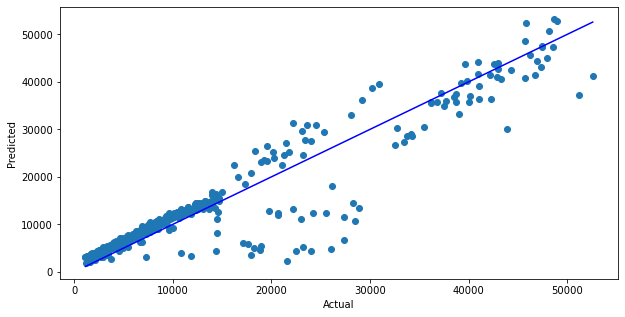

In [19]:
#PLot best model
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_preds[1])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue")
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [20]:
#Get difference in charges for best model
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_preds[1], "Difference": y_test-y_preds[4]})
pred_df[0:20]

,Actual,Predicted,Difference
0,9724.53000,12150.062496,-3157.134362
1,8547.69130,10486.618341,-1846.976227
2,45702.02235,48584.237845,-1024.803473
3,12950.07120,14054.354187,45.203338
4,9644.25250,8743.610487,3269.370408
5,4500.33925,5038.782810,-1323.577674
6,2198.18985,2944.931701,249.136869
7,11436.73815,13315.260337,-1963.220023
8,7537.16390,9234.329426,777.529685
9,5425.02335,7400.108754,-2172.906664


<a name="4"></a>
## 4 - Results

We can see from the plot and chart above that the polynomial model performs better than the simple linear model. With a score of 0.83 and test score of 0.87, we significantly improved the model.